In [1]:
import json
import pandas as pd
import numpy as np
from matplotlib import image
from matplotlib import pyplot as plt
from shapely.wkt import loads
import cv2 as cv
import shapely
import os
import copy
from functions import split_tile_dataset

In [3]:
img_dir = './Data/Images'
label_dir = './Data/Json'
buildings_dir = f'./Data/Buildings'
no_buildings_dir = f'./Data/No_Buildings'
split_tile_dataset(img_dir,label_dir,buildings_dir,no_buildings_dir)

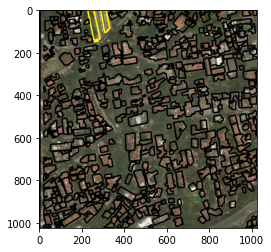

In [2]:
img = image.imread('./Data/Images/mexico-earthquake_00000000_post_disaster.png')
label_file = open('./Data/Json/mexico-earthquake_00000000_post_disaster.json')
label_data =json.load(label_file)
colours_dict = {'no-damage':[0,0,0],
           'minor-damage':[1,1,0]
           }
polygons = []
damage_state = []
colours = []
out = copy.deepcopy(img)
for _obj in label_data['features']['xy']:
    _polygon = loads(_obj['wkt'])
    polygons.append(_polygon)
    _polygon = np.array(list(_polygon.exterior.coords),dtype=np.int32)
    colour = colours_dict[_obj['properties']['subtype']]
    out = cv.polylines(out,[_polygon],True,colour,5)
plt.imshow(out)